In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
eurusd = pd.read_csv("data/EURUSD_daily.csv", index_col='Date')

In [18]:
eurusd.index = pd.to_datetime(eurusd.index)

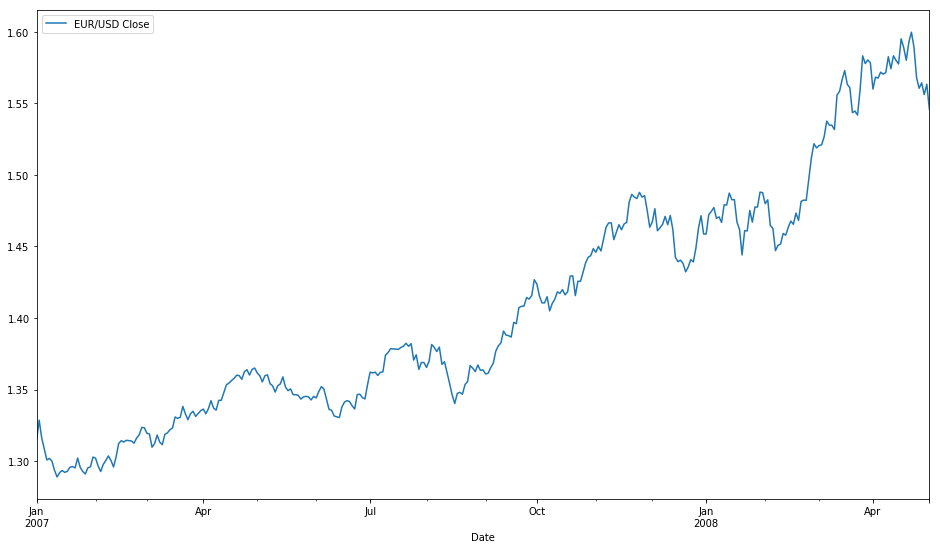

In [19]:
eurusd['2007-01-01':'2008-05-01'].plot(figsize=(16,9))

In [20]:
eurusd = eurusd['2007-01-01':'2008-05-01']

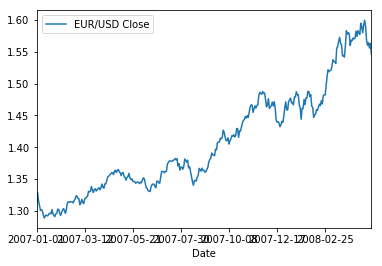